In [162]:
from scipy.optimize import fsolve
from scipy.optimize import minimize

def mgfh(PD):
    def equations(val, PD, k1, k2, n, Ab1, Ab2, c=40, Af=10):
        A, cb1, cb2 = val
        N = c * PD
        eq0 = (c - cb1 - cb2)/c * Af + cb1/c * Ab1 + cb2/c * Ab2 - A
        eq1 = cb1 - k1 * (c - cb1 - cb2) * (2*N - cb1) * (1 - cb2/N)
        eq2 = cb2 - k2 * (c - cb1 - cb2) * (N - n * cb2) * (1 - cb1/2/N)**2 * ((N - n * cb2)/(N - n * (n-1) * cb2))**(n-1)
        return (eq0, eq1, eq2)

    start = (3, 5, 10)
    args = (PD, 0.05, 0.5, 3, -0.5, 4)
    A, cb1, cb2 =  fsolve(equations, start, args, maxfev=2000)
    print(A, cb1, cb2, "error: ", equations((A, cb1, cb2), *args))
    return A
mgfh(0.5)

4.9352996959738045 16.4760688861643 4.931548142720448 error:  (0.0, -5.577760475716786e-13, -5.450804252404851e-10)


4.9352996959738045

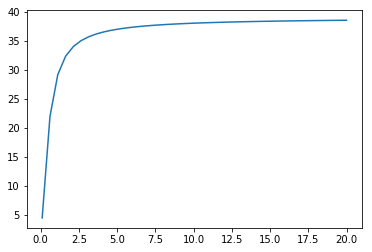

In [2]:
from matplotlib import pyplot as plt
import numpy as np

k1, k2, n, Ab1, Ab2 = 0.05, 0.5, 3, -0.5, 4
c, Af = 40, 10
cb2 = 1
cb1 = lambda N: (2*N**2*k1 + N*c*k1 - 3*N*cb2*k1 + N - c*cb2*k1 + cb2**2*k1 - np.sqrt(4*N**4*k1**2 - 4*N**3*c*k1**2 - 4*N**3*cb2*k1**2 + 4*N**3*k1 + N**2*c**2*k1**2 + 6*N**2*c*cb2*k1**2 + 2*N**2*c*k1 - 3*N**2*cb2**2*k1**2 - 6*N**2*cb2*k1 + N**2 - 2*N*c**2*cb2*k1**2 - 2*N*c*cb2*k1 + 2*N*cb2**3*k1**2 + 2*N*cb2**2*k1 + c**2*cb2**2*k1**2 - 2*c*cb2**3*k1**2 + cb2**4*k1**2))/(2*k1*(N - cb2))

pdr = list(np.linspace(0.1, 20, 40))
ar = [cb1(c*x) for x in pdr]
plt.plot(pdr, ar)

In [173]:
import sympy as sp
from sympy import symbols, cos, sin

A, N = symbols('A N')
c, Af = symbols('c Af')
k1, k2, n, Ab1, Ab2 = symbols('k1 k2 n Ab1 Ab2')
cb1, cb2 = symbols('cb1 cb2')

# N = c * PD
eq0 = (c - cb1 - cb2)/c * Af + cb1/c * Ab1 + cb2/c * Ab2 - A
eq1 = cb1 - k1 * (c - cb1 - cb2) * (2*N - cb1) * (1 - cb2/N)
eq2 = cb2 - k2 * (c - cb1 - cb2) * (N - n * cb2) * (1 - cb1/2/N)**2 * ((N - n * cb2)/(N - n * (n-1) * cb2))**(n-1)

sp.solvers.solve((eq1, eq2, eq0), (A, N))

KeyboardInterrupt: 

In [3]:
import sympy as sp
from sympy import symbols, cos, sin, sqrt

A, N = symbols('A N')
c, Af = symbols('c Af')
k1, k2, n, Ab1, Ab2 = symbols('k1 k2 n Ab1 Ab2')
cb1, cb2 = symbols('cb1 cb2')

# N = c * PD
eq0 = (c - cb1 - cb2)/c * Af + cb1/c * Ab1 + cb2/c * Ab2 - A
cb1 = (2*N**2*k1 + N*c*k1 - 3*N*cb2*k1 + N - c*cb2*k1 + cb2**2*k1 - sqrt(4*N**4*k1**2 - 4*N**3*c*k1**2 - 4*N**3*cb2*k1**2 + 4*N**3*k1 + N**2*c**2*k1**2 + 6*N**2*c*cb2*k1**2 + 2*N**2*c*k1 - 3*N**2*cb2**2*k1**2 - 6*N**2*cb2*k1 + N**2 - 2*N*c**2*cb2*k1**2 - 2*N*c*cb2*k1 + 2*N*cb2**3*k1**2 + 2*N*cb2**2*k1 + c**2*cb2**2*k1**2 - 2*c*cb2**3*k1**2 + cb2**4*k1**2))/(2*k1*(N - cb2))
eq2 = cb2 - k2 * (c - cb1 - cb2) * (N - n * cb2) * (1 - cb1/2/N)**2 * ((N - n * cb2)/(N - n * (n-1) * cb2))**(n-1)

sp.solvers.solve((eq2), (cb2))

KeyboardInterrupt: 

In [150]:
### MGVH - all good
from scipy.optimize import brentq

k, n = 0.02, 4
c, Af = 40, 10
PD = 10
N = c * PD

# Maybe use Scatchard for this - No
maxc = min([c, N/n])

mgvh = lambda cb, N: cb - k * (c - cb) * (N - n * cb) * ((N - n * cb)/(N - (n-1) * cb))**(n-1)
ans = brentq(mgvh, 0, maxc, N)
ans, mgvh(ans, N)
mgvh(maxc, N)

40.0

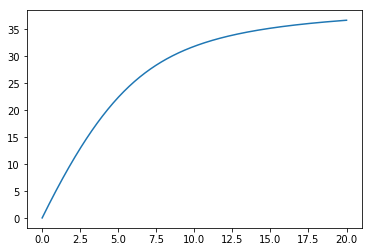

In [157]:
from matplotlib import pyplot as plt
import numpy as np
pdr = list(np.linspace(0.01, 20, 400))
ar = [brentq(mgvh, 0, min([c, x*c/n]), args=x*c) for x in pdr]
plt.plot(pdr, ar)
plt.show()

In [202]:
from scipy.optimize import root

k1, k2, n = 0.02, 0.05, 4
c, Af = 40, 10
PD = 3
N = c * PD
guess = min([c, N/n]) / 2

def eq(cbs, N):
    cb1, cb2 = cbs
    eq1 = cb1 - k1 * (c - cb1 - cb2) * (2*N - cb1) * (1 - cb2/N)
    eq2 = cb2 - k2 * (c - cb1 - cb2) * (N - n * cb2) * (1 - cb1/2/N)**2 * ((N - n * cb2)/(N - (n-1) * cb2))**(n-1)
    return (eq1, eq2)
ans = root(eq, (guess, guess), args=(N), method='lm')
guess, ans["x"], eq(ans["x"], N)

(15.0,
 array([22.76096665, 11.44787093]),
 (1.0658141036401503e-14, 8.881784197001252e-15))

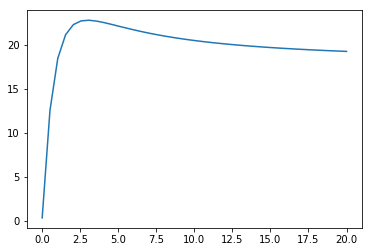

In [205]:
from matplotlib import pyplot as plt
import numpy as np
pdr = list(np.linspace(0.01, 20, 40))
ar = [root(eq, (min([c, x*c/n])/2, min([c, x*c/n])/2), args=(x*c), method='lm')["x"][0] for x in pdr]
plt.plot(pdr, ar)
plt.show()